In [1]:
"""
plots for outputs of 32_batchcrossdataset.py

Shaina Lu
Zador & Gillis Labs
March-May 2021
"""

'\nplots for outputs of 32_batchcrossdataset.py\n\nShaina Lu\nZador & Gillis Labs\nMarch-May 2021\n'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

In [3]:
#function for matplotlib formatting
def set_style():
    plt.style.use(['seaborn-white','seaborn-notebook'])
    plt.rcParams['figure.figsize'] = [6,4]
    plt.rcParams['axes.spines.top'] = False       #remove top line
    plt.rcParams['axes.spines.right'] = False     #remove right line
    plt.rcParams['axes.linewidth'] = 2.0          #set weight of axes
    plt.rcParams['axes.titlesize'] = 20           #set font size of title
    plt.rcParams['axes.labelsize'] = 18           #set font size of x,y labels
    plt.rcParams['axes.labelpad'] = 14            #space between labels and axes
    plt.rcParams['xtick.labelsize'] = 14          #set x label size
    plt.rcParams['ytick.labelsize'] = 14          #set y label size
    plt.rcParams['legend.fontsize'] = 16          #set legend font size
    
set_style()

In [20]:
def distyx(xdata, ydata):
    """takes in x and y data of a scatter plot and returns the average distance from the y=x line"""
    p1 = np.array([0,0])
    p2 = np.array([1,1])
    dists = []
    for i in range(len(xdata)):
        p3 = np.array([xdata[i],ydata[i]])
        dists.append(np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1))
    return np.nanmean(np.abs(dists))

# ST to ABA alpha = 0.1, ABA not downsampled

### Read in Data

In [62]:
STTRAIN_FILE = "/home/slu/spatial/data/cross_lasso_batch/STtoABA_STtrain_f1_0p1_031021.csv"
STTEST_FILE = "/home/slu/spatial/data/cross_lasso_batch/STtoABA_STtest_f1_0p1_031021.csv"
ABAALL_FILE = "/home/slu/spatial/data/cross_lasso_batch/STtoABA_ABAall_f1_0p1_031021.csv"

In [63]:
trainSTbatch = pd.read_csv(STTRAIN_FILE, sep=',')
trainSTbatch = trainSTbatch.set_index(trainSTbatch.columns)

testSTbatch = pd.read_csv(STTEST_FILE, sep=',')
testSTbatch = testSTbatch.set_index(testSTbatch.columns)

allABAbatch = pd.read_csv(ABAALL_FILE, sep=',')
allABAbatch = allABAbatch.set_index(allABAbatch.columns)

In [7]:
trainSTbatch.shape

(445, 445)

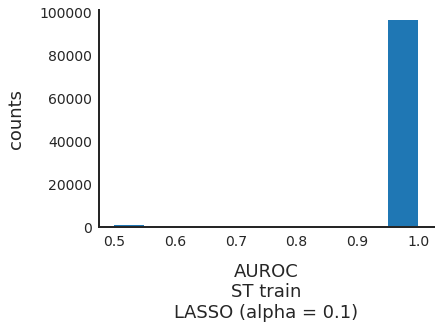

In [9]:
plt.hist(trainSTbatch.values[np.triu_indices_from(trainSTbatch, k=1)])
plt.xlabel("AUROC\nST train\nLASSO (alpha = 0.1)")
plt.ylabel("counts")
plt.show()

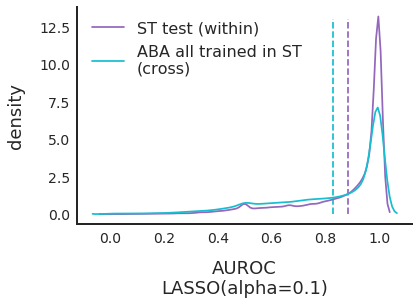

In [10]:
sns.kdeplot(testSTbatch.values[np.triu_indices_from(testSTbatch, k=1)], label="ST test (within)", color='C4')
sns.kdeplot(allABAbatch.values[np.triu_indices_from(allABAbatch.values, k=1)], label="ABA all trained in ST\n(cross)", color='C9')

#means
plt.vlines(x=np.mean(testSTbatch.values[np.triu_indices_from(testSTbatch, k=1)]), ymin=0, ymax=13, linestyles='--',colors='C4')
plt.vlines(x=np.mean(allABAbatch.values[np.triu_indices_from(allABAbatch, k=1)]), ymin=0, ymax=13, linestyles='--',colors='C9')

plt.xlabel("AUROC\nLASSO(alpha=0.1)")
plt.ylabel("density")
plt.legend()#loc=[1.0,0.5])

#plt.savefig("062920_4.pdf", bbox_inches='tight')
plt.show()

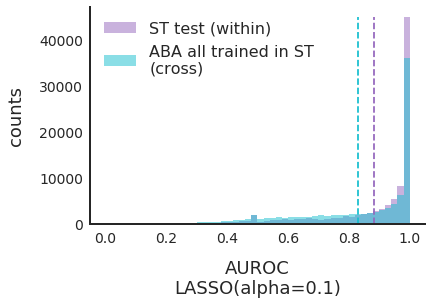

In [11]:
plt.hist(testSTbatch.values[np.triu_indices_from(testSTbatch, k=1)], label="ST test (within)", color='C4', alpha=0.5, bins=50)
plt.hist(allABAbatch.values[np.triu_indices_from(allABAbatch.values, k=1)], label="ABA all trained in ST\n(cross)", color='C9', alpha=0.5, bins=50)

#means
plt.vlines(x=np.mean(testSTbatch.values[np.triu_indices_from(testSTbatch, k=1)]), ymin=0, ymax=45000, linestyles='--',colors='C4')
plt.vlines(x=np.mean(allABAbatch.values[np.triu_indices_from(allABAbatch, k=1)]), ymin=0, ymax=45000, linestyles='--',colors='C9')

plt.xlabel("AUROC\nLASSO(alpha=0.1)")
plt.ylabel("counts")
plt.legend()#loc=[1.0,0.5])

#plt.savefig("062920_5.pdf", bbox_inches='tight')
plt.show()

In [12]:
print(np.mean(testSTbatch.values[np.triu_indices_from(testSTbatch, k=1)]))
print(np.mean(allABAbatch.values[np.triu_indices_from(allABAbatch.values, k=1)]))

0.8840765831689843
0.8290142377155635


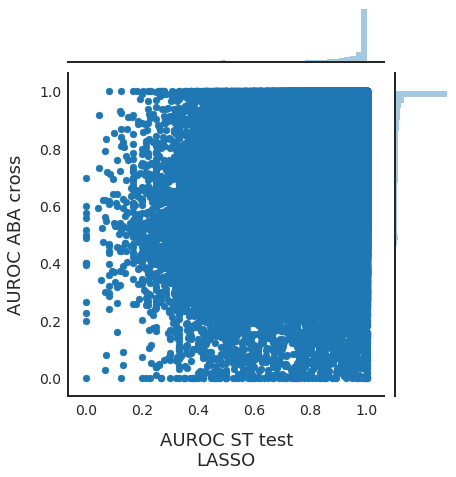

In [13]:
sns.jointplot(testSTbatch.values[np.triu_indices_from(testSTbatch, k=1)],allABAbatch.values[np.triu_indices_from(allABAbatch.values, k=1)])\
            .set_axis_labels("AUROC ST test\nLASSO", "AUROC ABA cross")
plt.show()

### compare batch corrected and not, on an individual brain areas basis

In [64]:
#non-batch corrected files
STTRAIN_FILE = "/home/slu/spatial/data/cross_lasso/STtoABA_STtrain_f1_0p1_051420.csv"
STTEST_FILE = "/home/slu/spatial/data/cross_lasso/STtoABA_STtest_f1_0p1_051420.csv"
ABAALL_FILE = "/home/slu/spatial/data/cross_lasso/STtoABA_ABAall_f1_0p1_051420.csv"

In [65]:
trainST = pd.read_csv(STTRAIN_FILE, sep=',')
trainST = trainST.set_index(trainST.columns)

testST = pd.read_csv(STTEST_FILE, sep=',')
testST = testST.set_index(testST.columns)

allABA = pd.read_csv(ABAALL_FILE, sep=',')
allABA = allABA.set_index(allABA.columns)

In [66]:
print(np.mean(testST.values[np.triu_indices_from(testST, k=1)]))
print(np.mean(allABA.values[np.triu_indices_from(allABA.values, k=1)]))

0.8840038290743126
0.8289630563889248


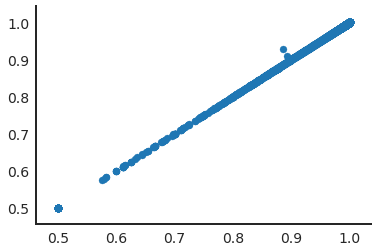

In [22]:
plt.scatter(trainST.values[np.triu_indices_from(trainST,k=1)], trainSTbatch.values[np.triu_indices_from(trainSTbatch,k=1)])
plt.show()

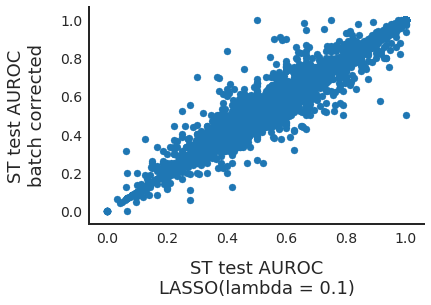

In [10]:
plt.scatter(testST.values[np.triu_indices_from(testST,k=1)], testSTbatch.values[np.triu_indices_from(testSTbatch,k=1)], rasterized=True)
plt.xlabel("ST test AUROC\nLASSO(lambda = 0.1)")
plt.ylabel("ST test AUROC\nbatch corrected")
#plt.savefig("040621_1.pdf", bbox_inches='tight')
plt.show()

In [67]:
diff = testST.values[np.triu_indices_from(testST,k=1)] - testSTbatch.values[np.triu_indices_from(testSTbatch,k=1)]
print(np.mean(np.abs(diff)))
print(np.median(diff))

0.0010678589619089428
0.0


In [21]:
distyx(testST.values[np.triu_indices_from(testST,k=1)],testSTbatch.values[np.triu_indices_from(testSTbatch,k=1)])

0.0007550903133166407

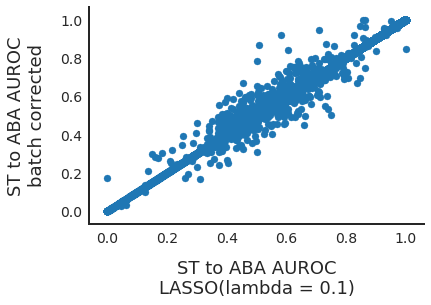

In [29]:
plt.scatter(allABA.values[np.triu_indices_from(allABA,k=1)], allABAbatch.values[np.triu_indices_from(allABAbatch,k=1)], rasterized=True)
plt.xlabel("ST to ABA AUROC\nLASSO(lambda = 0.1)")
plt.ylabel("ST to ABA AUROC\nbatch corrected")
#plt.savefig("040621_2.pdf", bbox_inches='tight')
plt.show()

In [22]:
distyx(allABA.values[np.triu_indices_from(allABA,k=1)], allABAbatch.values[np.triu_indices_from(allABAbatch,k=1)])

0.0002499697493600556

In [69]:
diff = allABA.values[np.triu_indices_from(allABA,k=1)] - allABAbatch.values[np.triu_indices_from(allABAbatch,k=1)]
print(np.mean(np.abs(diff)))
print(np.median(diff))

0.0003535106097279939
0.0


# ABA to ST alpha = 0.1

### Read in Data

In [33]:
ABATRAIN_FILE = "/home/slu/spatial/data/cross_lasso_batch/ABAtoST_ABAtrain_f1_0p1_031021.csv"
ABATEST_FILE = "/home/slu/spatial/data/cross_lasso_batch/ABAtoST_ABAtest_f1_0p1_031021.csv"
STALL_FILE = "/home/slu/spatial/data/cross_lasso_batch/ABAtoST_STall_f1_0p1_031021.csv"

In [34]:
trainABAbatch = pd.read_csv(ABATRAIN_FILE, sep=',')
trainABAbatch = trainABAbatch.set_index(trainABAbatch.columns)

testABAbatch = pd.read_csv(ABATEST_FILE, sep=',')
testABAbatch = testABAbatch.set_index(testABAbatch.columns)

allSTbatch = pd.read_csv(STALL_FILE, sep=',')
allSTbatch = allSTbatch.set_index(allSTbatch.columns)

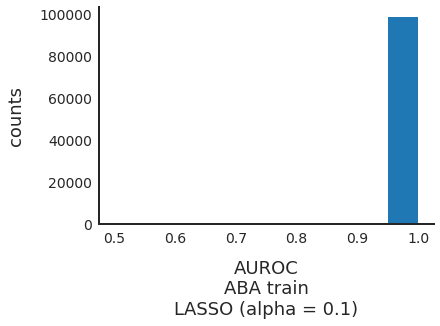

In [35]:
plt.hist(trainABAbatch.values[np.triu_indices_from(trainABAbatch, k=1)])
plt.xlabel("AUROC\nABA train\nLASSO (alpha = 0.1)")
plt.ylabel("counts")
plt.show()

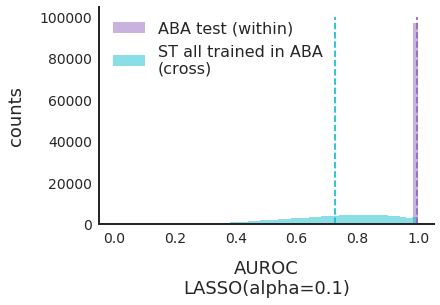

In [36]:
plt.hist(testABAbatch.values[np.triu_indices_from(testABAbatch, k=1)], label="ABA test (within)", color='C4', alpha=0.5, bins=50)
plt.hist(allSTbatch.values[np.triu_indices_from(allSTbatch.values, k=1)], label="ST all trained in ABA\n(cross)", color='C9', alpha=0.5, bins=50)

#means
plt.vlines(x=np.mean(testABAbatch.values[np.triu_indices_from(testABAbatch, k=1)]), ymin=0, ymax=100000, linestyles='--',colors='C4')
plt.vlines(x=np.mean(allSTbatch.values[np.triu_indices_from(allSTbatch, k=1)]), ymin=0, ymax=100000, linestyles='--',colors='C9')

plt.xlabel("AUROC\nLASSO(alpha=0.1)")
plt.ylabel("counts")
plt.legend()#loc=[1.0,0.5])

#plt.savefig("062920_6.pdf", bbox_inches='tight')
plt.show()

In [37]:
print(np.mean(testABAbatch.values[np.triu_indices_from(testABAbatch, k=1)]))
print(np.mean(allSTbatch.values[np.triu_indices_from(allSTbatch.values, k=1)]))

0.9970110668712492
0.7248520121280496


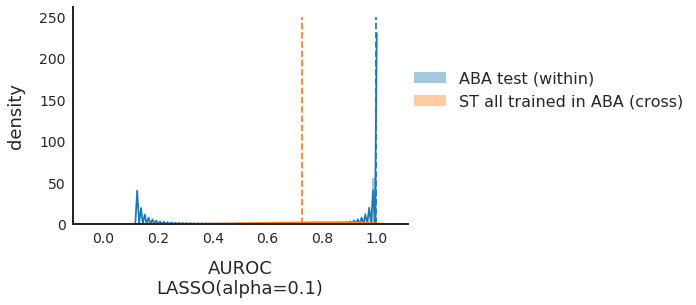

In [38]:
sns.distplot(testABAbatch.values[np.triu_indices_from(testABAbatch, k=1)], label="ABA test (within)")
sns.distplot(allSTbatch.values[np.triu_indices_from(allSTbatch.values, k=1)], label="ST all trained in ABA (cross)")

#means
plt.vlines(x=np.mean(testABAbatch.values[np.triu_indices_from(testABAbatch, k=1)]), ymin=0, ymax=250, linestyles='--',colors='C0')
plt.vlines(x=np.mean(allSTbatch.values[np.triu_indices_from(allSTbatch, k=1)]), ymin=0, ymax=250, linestyles='--',colors='C1')

plt.xlabel("AUROC\nLASSO(alpha=0.1)")
plt.ylabel("density")
plt.legend(loc=[1.0,0.5])

#plt.savefig("051920_4.pdf", bbox_inches='tight')
plt.show()

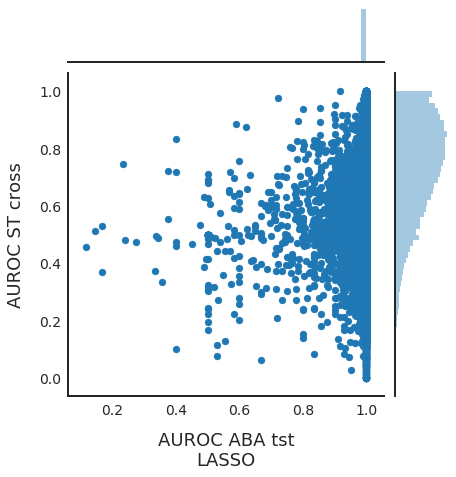

In [39]:
sns.jointplot(testABAbatch.values[np.triu_indices_from(testABAbatch, k=1)],allSTbatch.values[np.triu_indices_from(allSTbatch.values, k=1)])\
            .set_axis_labels("AUROC ABA tst\nLASSO", "AUROC ST cross")
plt.show()

### compare batch corrected and not on an individual brain areas basis

In [42]:
#non-batch corrected files
ABATRAIN_FILE = "/home/slu/spatial/data/cross_lasso/ABAtoST_ABAtrain_f1_0p1_051420.csv"
ABATEST_FILE = "/home/slu/spatial/data/cross_lasso/ABAtoST_ABAtest_f1_0p1_051420.csv"
STALL_FILE = "/home/slu/spatial/data/cross_lasso/ABAtoST_STall_f1_0p1_051420.csv"

In [43]:
trainABA = pd.read_csv(ABATRAIN_FILE, sep=',')
trainABA = trainABA.set_index(trainABA.columns)

testABA = pd.read_csv(ABATEST_FILE, sep=',')
testABA = testABA.set_index(testABA.columns)

allST = pd.read_csv(STALL_FILE, sep=',')
allST = allST.set_index(allST.columns)

In [45]:
print(np.mean(testABA.values[np.triu_indices_from(testABA, k=1)]))
print(np.mean(allST.values[np.triu_indices_from(allST.values, k=1)]))

0.9970110668712492
0.7248534250923502


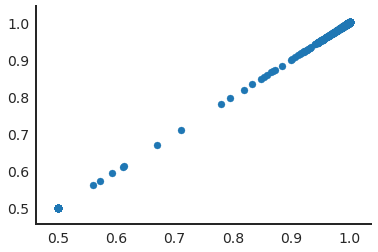

In [46]:
plt.scatter(trainABA.values[np.triu_indices_from(trainABA,k=1)], trainABAbatch.values[np.triu_indices_from(trainABAbatch,k=1)])
plt.show()

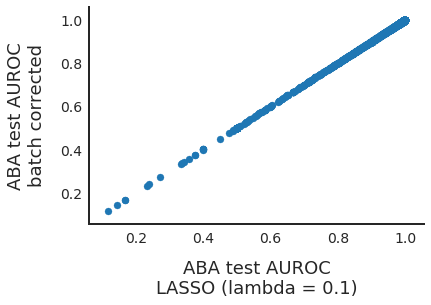

In [48]:
plt.scatter(testABA.values[np.triu_indices_from(testABA,k=1)], testABAbatch.values[np.triu_indices_from(testABAbatch,k=1)], rasterized=True)
plt.xlabel("ABA test AUROC\nLASSO (lambda = 0.1)")
plt.ylabel("ABA test AUROC\nbatch corrected")
plt.savefig("040621_3.pdf", bbox_inches='tight')
plt.show()

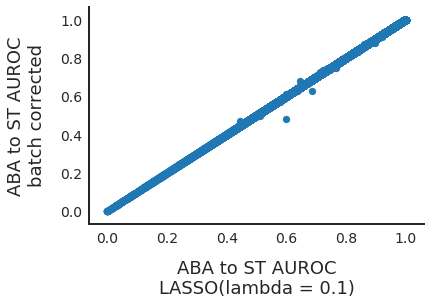

In [49]:
plt.scatter(allST.values[np.triu_indices_from(allST,k=1)], allSTbatch.values[np.triu_indices_from(allSTbatch,k=1)], rasterized=True)
plt.xlabel("ABA to ST AUROC\nLASSO(lambda = 0.1)")
plt.ylabel("ABA to ST AUROC\nbatch corrected")
plt.savefig("040621_4.pdf", bbox_inches='tight')
plt.show()

# ST to ABA alpha = 0.1, ABA downsampled

### Read in Data

In [53]:
STTRAIN_FILE = "/home/slu/spatial/data/cross_lasso_batch/STtoABA_STtrain_f1_0p1_050521.csv"
STTEST_FILE = "/home/slu/spatial/data/cross_lasso_batch/STtoABA_STtest_f1_0p1_050521.csv"
ABAALL_FILE = "/home/slu/spatial/data/cross_lasso_batch/STtoABA_ABAall_f1_0p1_050521.csv"

In [54]:
trainSTbatch = pd.read_csv(STTRAIN_FILE, sep=',')
trainSTbatch = trainSTbatch.set_index(trainSTbatch.columns)

testSTbatch = pd.read_csv(STTEST_FILE, sep=',')
testSTbatch = testSTbatch.set_index(testSTbatch.columns)

allABAbatch = pd.read_csv(ABAALL_FILE, sep=',')
allABAbatch = allABAbatch.set_index(allABAbatch.columns)

In [55]:
trainSTbatch.shape

(414, 414)

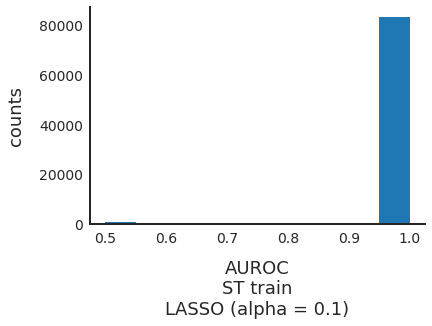

In [56]:
plt.hist(trainSTbatch.values[np.triu_indices_from(trainSTbatch, k=1)])
plt.xlabel("AUROC\nST train\nLASSO (alpha = 0.1)")
plt.ylabel("counts")
plt.show()

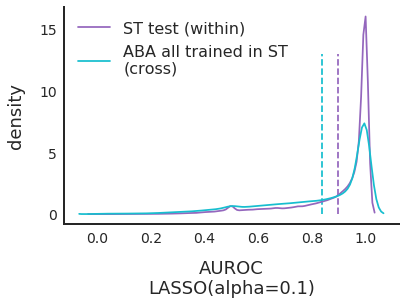

In [57]:
sns.kdeplot(testSTbatch.values[np.triu_indices_from(testSTbatch, k=1)], label="ST test (within)", color='C4')
sns.kdeplot(allABAbatch.values[np.triu_indices_from(allABAbatch.values, k=1)], label="ABA all trained in ST\n(cross)", color='C9')

#means
plt.vlines(x=np.mean(testSTbatch.values[np.triu_indices_from(testSTbatch, k=1)]), ymin=0, ymax=13, linestyles='--',colors='C4')
plt.vlines(x=np.mean(allABAbatch.values[np.triu_indices_from(allABAbatch, k=1)]), ymin=0, ymax=13, linestyles='--',colors='C9')

plt.xlabel("AUROC\nLASSO(alpha=0.1)")
plt.ylabel("density")
plt.legend()#loc=[1.0,0.5])

#plt.savefig("062920_4.pdf", bbox_inches='tight')
plt.show()

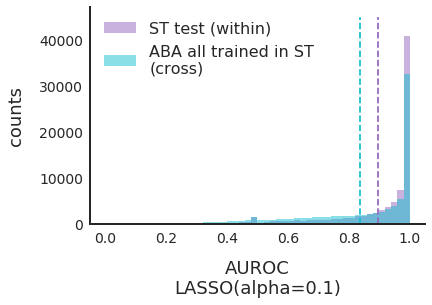

In [58]:
plt.hist(testSTbatch.values[np.triu_indices_from(testSTbatch, k=1)], label="ST test (within)", color='C4', alpha=0.5, bins=50)
plt.hist(allABAbatch.values[np.triu_indices_from(allABAbatch.values, k=1)], label="ABA all trained in ST\n(cross)", color='C9', alpha=0.5, bins=50)

#means
plt.vlines(x=np.mean(testSTbatch.values[np.triu_indices_from(testSTbatch, k=1)]), ymin=0, ymax=45000, linestyles='--',colors='C4')
plt.vlines(x=np.mean(allABAbatch.values[np.triu_indices_from(allABAbatch, k=1)]), ymin=0, ymax=45000, linestyles='--',colors='C9')

plt.xlabel("AUROC\nLASSO(alpha=0.1)")
plt.ylabel("counts")
plt.legend()#loc=[1.0,0.5])

#plt.savefig("062920_5.pdf", bbox_inches='tight')
plt.show()

In [59]:
print(np.mean(testSTbatch.values[np.triu_indices_from(testSTbatch, k=1)]))
print(np.mean(allABAbatch.values[np.triu_indices_from(allABAbatch.values, k=1)]))

0.8973217167267252
0.8375484775288231


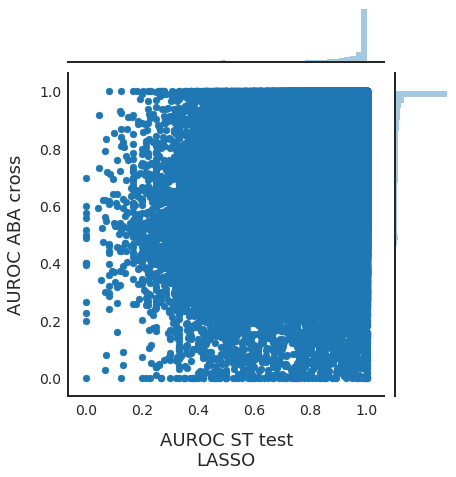

In [13]:
sns.jointplot(testSTbatch.values[np.triu_indices_from(testSTbatch, k=1)],allABAbatch.values[np.triu_indices_from(allABAbatch.values, k=1)])\
            .set_axis_labels("AUROC ST test\nLASSO", "AUROC ABA cross")
plt.show()

### compare batch corrected and not on an individual brain areas basis

In [56]:
#non-batch corrected files
STTRAIN_FILE = "/home/slu/spatial/data/cross_lasso/STtoABA_STtrain_f1_0p1_051420.csv"
STTEST_FILE = "/home/slu/spatial/data/cross_lasso/STtoABA_STtest_f1_0p1_051420.csv"
ABAALL_FILE = "/home/slu/spatial/data/cross_lasso/STtoABA_ABAall_f1_0p1_051420.csv"

In [57]:
trainST = pd.read_csv(STTRAIN_FILE, sep=',')
trainST = trainST.set_index(trainST.columns)

testST = pd.read_csv(STTEST_FILE, sep=',')
testST = testST.set_index(testST.columns)

allABA = pd.read_csv(ABAALL_FILE, sep=',')
allABA = allABA.set_index(allABA.columns)

__need to subset without batch for areas left in downsampled batch__

In [58]:
trainST = trainST.loc[trainSTbatch.index,trainSTbatch.index]
testST = testST.loc[testSTbatch.index,testSTbatch.index]
allABA = allABA.loc[allABAbatch.index, allABAbatch.index]

In [59]:
print(np.mean(testST.values[np.triu_indices_from(testST, k=1)]))
print(np.mean(allABA.values[np.triu_indices_from(allABA.values, k=1)]))

0.8972945251182478
0.8391400632862352


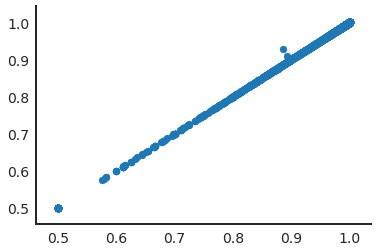

In [30]:
plt.scatter(trainST.values[np.triu_indices_from(trainST,k=1)], trainSTbatch.values[np.triu_indices_from(trainSTbatch,k=1)])
plt.show()

note that exact method for scatter changes, but produces the same plot (I checked)

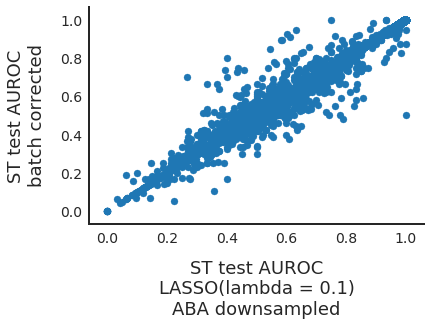

In [95]:
plt.scatter(np.ma.masked_invalid(testST.values), np.ma.masked_invalid(testSTbatch.values), rasterized=True)
plt.xlabel("ST test AUROC\nLASSO(lambda = 0.1)\nABA downsampled")
plt.ylabel("ST test AUROC\nbatch corrected")
plt.savefig("050521_1.pdf", bbox_inches='tight')
plt.show()

In [60]:
diff = np.ma.masked_invalid(testST.values) - np.ma.masked_invalid(testSTbatch.values)
print(np.mean(np.abs(diff)))
print(np.median(diff))

0.0007246262815687785
nan


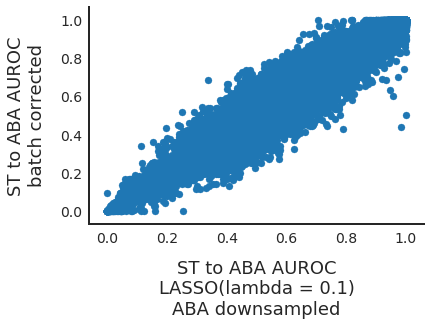

In [97]:
plt.scatter(np.ma.masked_invalid(allABA.values), np.ma.masked_invalid(allABAbatch.values), rasterized=True)
plt.xlabel("ST to ABA AUROC\nLASSO(lambda = 0.1)\nABA downsampled")
plt.ylabel("ST to ABA AUROC\nbatch corrected")
plt.savefig("050521_2.pdf", bbox_inches='tight')
plt.show()

In [61]:
diff = np.ma.masked_invalid(allABA.values) - np.ma.masked_invalid(allABAbatch.values)
print(np.mean(np.abs(diff)))
print(np.median(diff))

0.022102026718874342
nan


# ABA to ST alpha = 0.1, ABA downsampled

### Read in Data

In [42]:
ABATRAIN_FILE = "/home/slu/spatial/data/cross_lasso_batch/ABAtoST_ABAtrain_f1_0p1_050521.csv"
ABATEST_FILE = "/home/slu/spatial/data/cross_lasso_batch/ABAtoST_ABAtest_f1_0p1_050521.csv"
STALL_FILE = "/home/slu/spatial/data/cross_lasso_batch/ABAtoST_STall_f1_0p1_050521.csv"

In [43]:
trainABAbatch = pd.read_csv(ABATRAIN_FILE, sep=',')
trainABAbatch = trainABAbatch.set_index(trainABAbatch.columns)

testABAbatch = pd.read_csv(ABATEST_FILE, sep=',')
testABAbatch = testABAbatch.set_index(testABAbatch.columns)

allSTbatch = pd.read_csv(STALL_FILE, sep=',')
allSTbatch = allSTbatch.set_index(allSTbatch.columns)

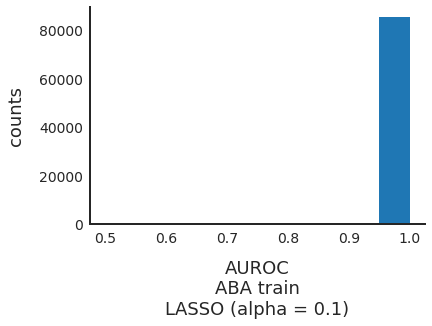

In [6]:
plt.hist(trainABAbatch.values[np.triu_indices_from(trainABAbatch, k=1)])
plt.xlabel("AUROC\nABA train\nLASSO (alpha = 0.1)")
plt.ylabel("counts")
plt.show()

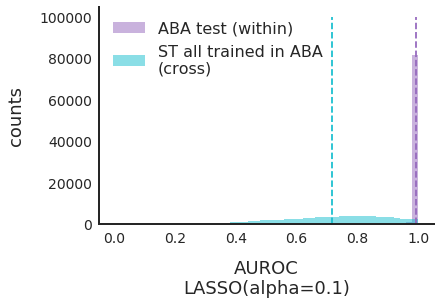

In [7]:
plt.hist(testABAbatch.values[np.triu_indices_from(testABAbatch, k=1)], label="ABA test (within)", color='C4', alpha=0.5, bins=50)
plt.hist(allSTbatch.values[np.triu_indices_from(allSTbatch.values, k=1)], label="ST all trained in ABA\n(cross)", color='C9', alpha=0.5, bins=50)

#means
plt.vlines(x=np.mean(testABAbatch.values[np.triu_indices_from(testABAbatch, k=1)]), ymin=0, ymax=100000, linestyles='--',colors='C4')
plt.vlines(x=np.mean(allSTbatch.values[np.triu_indices_from(allSTbatch, k=1)]), ymin=0, ymax=100000, linestyles='--',colors='C9')

plt.xlabel("AUROC\nLASSO(alpha=0.1)")
plt.ylabel("counts")
plt.legend()#loc=[1.0,0.5])

#plt.savefig("050521_6.pdf", bbox_inches='tight')
plt.show()

In [9]:
print(np.mean(testABAbatch.values[np.triu_indices_from(testABAbatch, k=1)]))
print(np.mean(allSTbatch.values[np.triu_indices_from(allSTbatch.values, k=1)]))

0.9907917537068233
0.7148642874920691


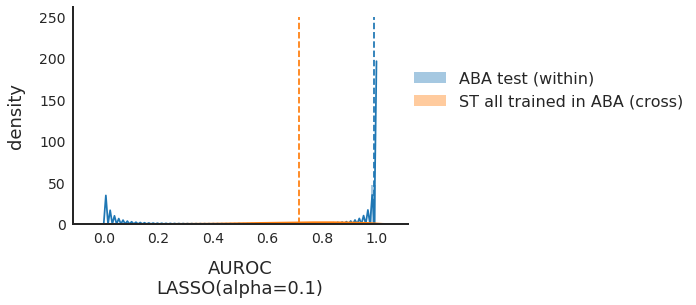

In [10]:
sns.distplot(testABAbatch.values[np.triu_indices_from(testABAbatch, k=1)], label="ABA test (within)")
sns.distplot(allSTbatch.values[np.triu_indices_from(allSTbatch.values, k=1)], label="ST all trained in ABA (cross)")

#means
plt.vlines(x=np.mean(testABAbatch.values[np.triu_indices_from(testABAbatch, k=1)]), ymin=0, ymax=250, linestyles='--',colors='C0')
plt.vlines(x=np.mean(allSTbatch.values[np.triu_indices_from(allSTbatch, k=1)]), ymin=0, ymax=250, linestyles='--',colors='C1')

plt.xlabel("AUROC\nLASSO(alpha=0.1)")
plt.ylabel("density")
plt.legend(loc=[1.0,0.5])

#plt.savefig("051920_4.pdf", bbox_inches='tight')
plt.show()

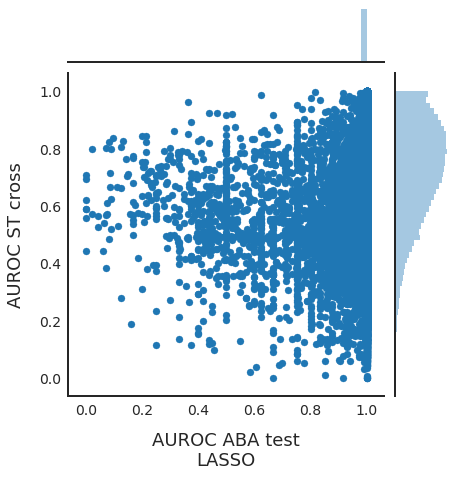

In [12]:
sns.jointplot(testABAbatch.values[np.triu_indices_from(testABAbatch, k=1)],allSTbatch.values[np.triu_indices_from(allSTbatch.values, k=1)])\
            .set_axis_labels("AUROC ABA test\nLASSO", "AUROC ST cross")
plt.show()

### compare batch corrected and not on an individual brain areas basis

In [44]:
#non-batch corrected files
ABATRAIN_FILE = "/home/slu/spatial/data/cross_lasso/ABAtoST_ABAtrain_f1_0p1_051420.csv"
ABATEST_FILE = "/home/slu/spatial/data/cross_lasso/ABAtoST_ABAtest_f1_0p1_051420.csv"
STALL_FILE = "/home/slu/spatial/data/cross_lasso/ABAtoST_STall_f1_0p1_051420.csv"

In [45]:
trainABA = pd.read_csv(ABATRAIN_FILE, sep=',')
trainABA = trainABA.set_index(trainABA.columns)

testABA = pd.read_csv(ABATEST_FILE, sep=',')
testABA = testABA.set_index(testABA.columns)

allST = pd.read_csv(STALL_FILE, sep=',')
allST = allST.set_index(allST.columns)

__need to subset without batch for areas left in downsampled batch__

In [46]:
trainABA = trainABA.loc[trainABAbatch.index,trainABAbatch.index]
testABA = testABA.loc[testABAbatch.index,testABAbatch.index]
allST = allST.loc[allSTbatch.index, allSTbatch.index]

In [47]:
print(np.mean(testABA.values[np.triu_indices_from(testABA, k=1)]))
print(np.mean(allST.values[np.triu_indices_from(allST.values, k=1)]))

0.9979497810958876
0.734174289060135


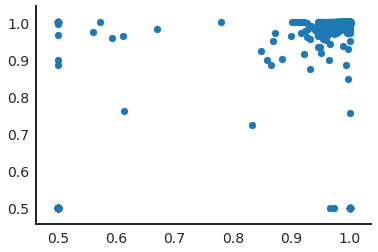

In [19]:
plt.scatter(trainABA.values[np.triu_indices_from(trainABA,k=1)], trainABAbatch.values[np.triu_indices_from(trainABAbatch,k=1)])
plt.show()

note that exact method for scatter changes, but produces the same plot (I checked)

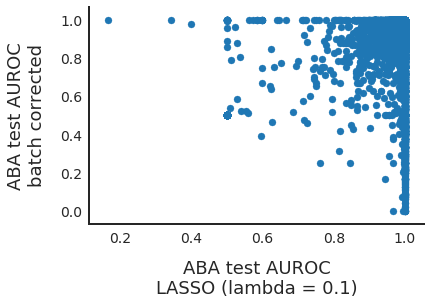

In [27]:
plt.scatter(np.ma.masked_invalid(testABA.values), np.ma.masked_invalid(testABAbatch.values), rasterized=True)
plt.xlabel("ABA test AUROC\nLASSO (lambda = 0.1)")
plt.ylabel("ABA test AUROC\nbatch corrected")
plt.savefig("050521_6.pdf", bbox_inches='tight')
plt.show()

In [52]:
diff = np.ma.masked_invalid(testABA.values) - np.ma.masked_invalid(testABAbatch.values)
print(np.mean(np.abs(diff)))
print(np.median(diff))

0.008472789133658528
nan


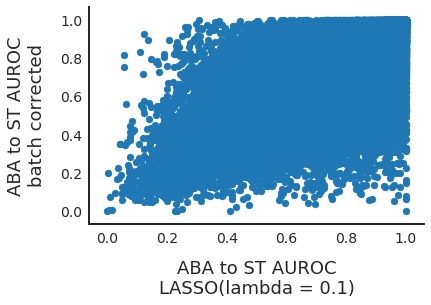

In [25]:
plt.scatter(np.ma.masked_invalid(allST.values), np.ma.masked_invalid(allSTbatch.values), rasterized=True)
plt.xlabel("ABA to ST AUROC\nLASSO(lambda = 0.1)")
plt.ylabel("ABA to ST AUROC\nbatch corrected")
plt.savefig("050521_7.pdf", bbox_inches='tight')
plt.show()

In [50]:
diff = np.ma.masked_invalid(allST.values) - np.ma.masked_invalid(allSTbatch.values)
print(np.mean(np.abs(diff)))
print(np.median(diff))

0.08761924824265797
nan


# ST to ABA alpha = 0.1, batch correct after subsetting for area

### Read in Data

In [49]:
STTRAIN_FILE = "/home/slu/spatial/data/cross_lasso_batch/STtoABA_STtrain_f1_0p1areabatch_040821.csv"
STTEST_FILE = "/home/slu/spatial/data/cross_lasso_batch/STtoABA_STtest_f1_0p1areabatch_040821.csv"
ABAALL_FILE = "/home/slu/spatial/data/cross_lasso_batch/STtoABA_ABAall_f1_0p1areabatch_040821.csv"

In [50]:
trainSTbatch = pd.read_csv(STTRAIN_FILE, sep=',')
trainSTbatch = trainSTbatch.set_index(trainSTbatch.columns)

testSTbatch = pd.read_csv(STTEST_FILE, sep=',')
testSTbatch = testSTbatch.set_index(testSTbatch.columns)

allABAbatch = pd.read_csv(ABAALL_FILE, sep=',')
allABAbatch = allABAbatch.set_index(allABAbatch.columns)

In [51]:
trainSTbatch.shape

(62, 62)

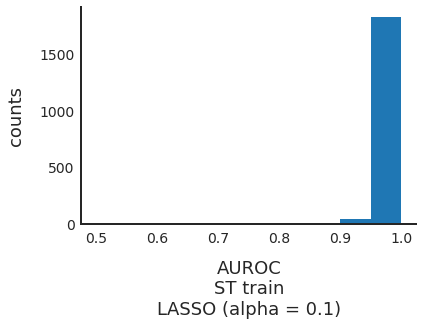

In [52]:
plt.hist(trainSTbatch.values[np.triu_indices_from(trainSTbatch, k=1)])
plt.xlabel("AUROC\nST train\nLASSO (alpha = 0.1)")
plt.ylabel("counts")
plt.show()

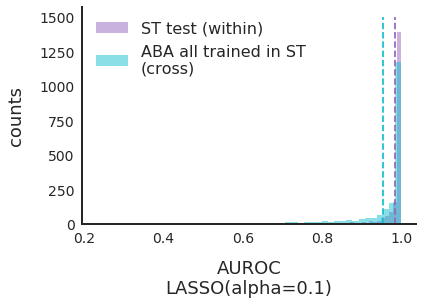

In [58]:
plt.hist(testSTbatch.values[np.triu_indices_from(testSTbatch, k=1)], label="ST test (within)", color='C4', alpha=0.5, bins=50)
plt.hist(allABAbatch.values[np.triu_indices_from(allABAbatch.values, k=1)], label="ABA all trained in ST\n(cross)", color='C9', alpha=0.5, bins=50)

#means
plt.vlines(x=np.mean(testSTbatch.values[np.triu_indices_from(testSTbatch, k=1)]), ymin=0, ymax=1500, linestyles='--',colors='C4')
plt.vlines(x=np.mean(allABAbatch.values[np.triu_indices_from(allABAbatch, k=1)]), ymin=0, ymax=1500, linestyles='--',colors='C9')

plt.xlabel("AUROC\nLASSO(alpha=0.1)")
plt.ylabel("counts")
plt.legend()#loc=[1.0,0.5])

#plt.savefig("062920_5.pdf", bbox_inches='tight')
plt.show()

In [59]:
print(np.mean(testSTbatch.values[np.triu_indices_from(testSTbatch, k=1)]))
print(np.mean(allABAbatch.values[np.triu_indices_from(allABAbatch.values, k=1)]))

0.9841447873655963
0.9534496840401676


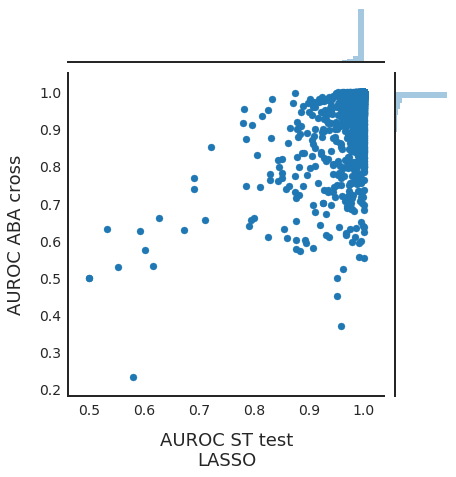

In [60]:
sns.jointplot(testSTbatch.values[np.triu_indices_from(testSTbatch, k=1)],allABAbatch.values[np.triu_indices_from(allABAbatch.values, k=1)])\
            .set_axis_labels("AUROC ST test\nLASSO", "AUROC ABA cross")
plt.show()

### compare batch corrected and not on an individual brain areas basis

In [61]:
#non-batch corrected files
STTRAIN_FILE = "/home/slu/spatial/data/cross_lasso/STtoABA_STtrain_f1_0p1_051420.csv"
STTEST_FILE = "/home/slu/spatial/data/cross_lasso/STtoABA_STtest_f1_0p1_051420.csv"
ABAALL_FILE = "/home/slu/spatial/data/cross_lasso/STtoABA_ABAall_f1_0p1_051420.csv"

In [62]:
trainST = pd.read_csv(STTRAIN_FILE, sep=',')
trainST = trainST.set_index(trainST.columns)

testST = pd.read_csv(STTEST_FILE, sep=',')
testST = testST.set_index(testST.columns)

allABA = pd.read_csv(ABAALL_FILE, sep=',')
allABA = allABA.set_index(allABA.columns)

__need to subset without batch for areas left in downsampled batch__

In [63]:
trainST = trainST.loc[trainSTbatch.index,trainSTbatch.index]
testST = testST.loc[testSTbatch.index,testSTbatch.index]
allABA = allABA.loc[allABAbatch.index, allABAbatch.index]

In [64]:
print(np.mean(testST.values[np.triu_indices_from(testST, k=1)]))
print(np.mean(allABA.values[np.triu_indices_from(allABA.values, k=1)]))

0.9841448466131535
0.9534496840401676


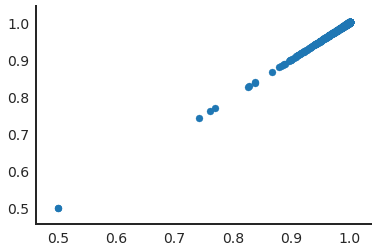

In [65]:
plt.scatter(trainST.values[np.triu_indices_from(trainST,k=1)], trainSTbatch.values[np.triu_indices_from(trainSTbatch,k=1)])
plt.show()

note that exact method for scatter changes, but produces the same plot (I checked)

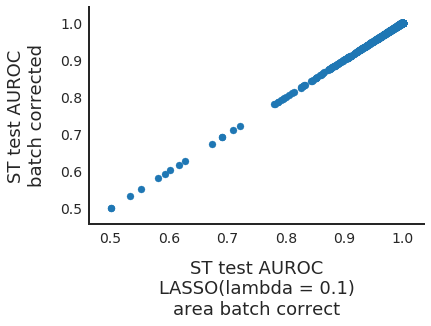

In [66]:
plt.scatter(np.ma.masked_invalid(testST.values), np.ma.masked_invalid(testSTbatch.values), rasterized=True)
plt.xlabel("ST test AUROC\nLASSO(lambda = 0.1)\narea batch correct")
plt.ylabel("ST test AUROC\nbatch corrected")
plt.savefig("050521_8.pdf", bbox_inches='tight')
plt.show()

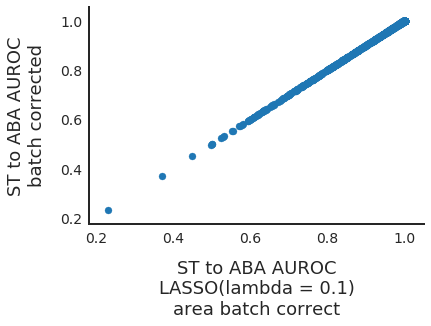

In [67]:
plt.scatter(np.ma.masked_invalid(allABA.values), np.ma.masked_invalid(allABAbatch.values), rasterized=True)
plt.xlabel("ST to ABA AUROC\nLASSO(lambda = 0.1)\narea batch correct")
plt.ylabel("ST to ABA AUROC\nbatch corrected")
plt.savefig("050521_9.pdf", bbox_inches='tight')
plt.show()

# ABA to ST alpha = 0.1, batch correct after subsetting for area

### Read in Data

In [68]:
ABATRAIN_FILE = "/home/slu/spatial/data/cross_lasso_batch/ABAtoST_ABAtrain_f1_0p1areabatch_041121.csv"
ABATEST_FILE = "/home/slu/spatial/data/cross_lasso_batch/ABAtoST_ABAtest_f1_0p1areabatch_041121.csv"
STALL_FILE = "/home/slu/spatial/data/cross_lasso_batch/ABAtoST_STall_f1_0p1areabatch_041121.csv"

In [69]:
trainABAbatch = pd.read_csv(ABATRAIN_FILE, sep=',')
trainABAbatch = trainABAbatch.set_index(trainABAbatch.columns)

testABAbatch = pd.read_csv(ABATEST_FILE, sep=',')
testABAbatch = testABAbatch.set_index(testABAbatch.columns)

allSTbatch = pd.read_csv(STALL_FILE, sep=',')
allSTbatch = allSTbatch.set_index(allSTbatch.columns)

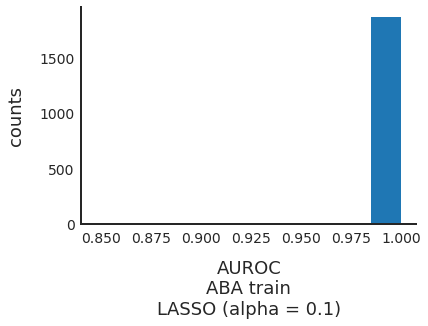

In [70]:
plt.hist(trainABAbatch.values[np.triu_indices_from(trainABAbatch, k=1)])
plt.xlabel("AUROC\nABA train\nLASSO (alpha = 0.1)")
plt.ylabel("counts")
plt.show()

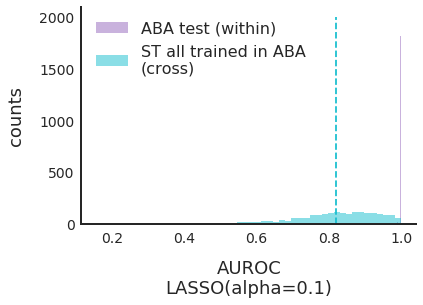

In [80]:
plt.hist(testABAbatch.values[np.triu_indices_from(testABAbatch, k=1)], label="ABA test (within)", color='C4', alpha=0.5, bins=50)
plt.hist(allSTbatch.values[np.triu_indices_from(allSTbatch.values, k=1)], label="ST all trained in ABA\n(cross)", color='C9', alpha=0.5, bins=50)

#means
#plt.vlines(x=np.mean(testABAbatch.values[np.triu_indices_from(testABAbatch, k=1)]), ymin=0, ymax=2000, linestyles='--',colors='C4')
plt.vlines(x=np.mean(allSTbatch.values[np.triu_indices_from(allSTbatch, k=1)]), ymin=0, ymax=2000, linestyles='--',colors='C9')

plt.xlabel("AUROC\nLASSO(alpha=0.1)")
plt.ylabel("counts")
plt.legend()#loc=[1.0,0.5])

#plt.savefig("050521_6.pdf", bbox_inches='tight')
plt.show()

In [82]:
print(np.mean(testABAbatch.values[np.triu_indices_from(testABAbatch, k=1)]))
print(np.mean(allSTbatch.values[np.triu_indices_from(allSTbatch.values, k=1)]))

0.9987501189688902
0.821367275410273


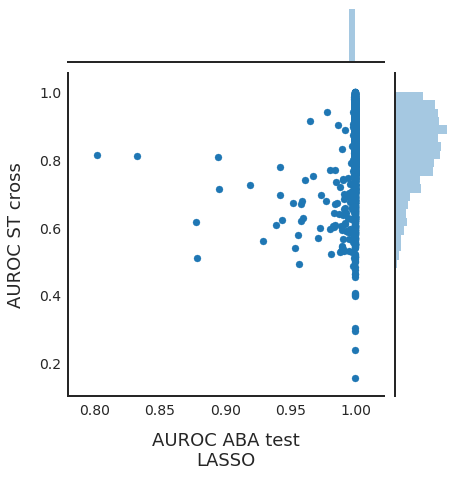

In [84]:
sns.jointplot(testABAbatch.values[np.triu_indices_from(testABAbatch, k=1)],allSTbatch.values[np.triu_indices_from(allSTbatch.values, k=1)])\
            .set_axis_labels("AUROC ABA test\nLASSO", "AUROC ST cross")
plt.show()

### compare batch corrected and not on an individual brain areas basis

In [85]:
#non-batch corrected files
ABATRAIN_FILE = "/home/slu/spatial/data/cross_lasso/ABAtoST_ABAtrain_f1_0p1_051420.csv"
ABATEST_FILE = "/home/slu/spatial/data/cross_lasso/ABAtoST_ABAtest_f1_0p1_051420.csv"
STALL_FILE = "/home/slu/spatial/data/cross_lasso/ABAtoST_STall_f1_0p1_051420.csv"

In [86]:
trainABA = pd.read_csv(ABATRAIN_FILE, sep=',')
trainABA = trainABA.set_index(trainABA.columns)

testABA = pd.read_csv(ABATEST_FILE, sep=',')
testABA = testABA.set_index(testABA.columns)

allST = pd.read_csv(STALL_FILE, sep=',')
allST = allST.set_index(allST.columns)

__need to subset without batch for areas left in downsampled batch__

In [87]:
trainABA = trainABA.loc[trainABAbatch.index,trainABAbatch.index]
testABA = testABA.loc[testABAbatch.index,testABAbatch.index]
allST = allST.loc[allSTbatch.index, allSTbatch.index]

In [88]:
print(np.mean(testABA.values[np.triu_indices_from(testABA, k=1)]))
print(np.mean(allST.values[np.triu_indices_from(allST.values, k=1)]))

0.9987501189688902
0.8213677561277243


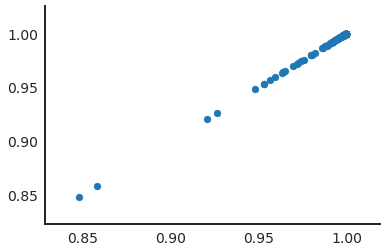

In [89]:
plt.scatter(trainABA.values[np.triu_indices_from(trainABA,k=1)], trainABAbatch.values[np.triu_indices_from(trainABAbatch,k=1)])
plt.show()

note that exact method for scatter changes, but produces the same plot (I checked)

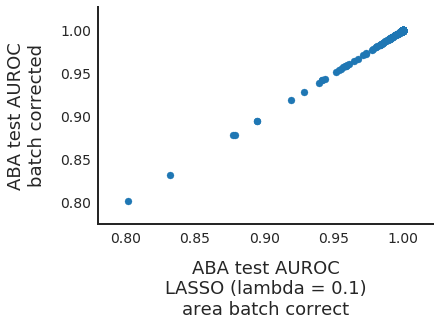

In [91]:
plt.scatter(np.ma.masked_invalid(testABA.values), np.ma.masked_invalid(testABAbatch.values), rasterized=True)
plt.xlabel("ABA test AUROC\nLASSO (lambda = 0.1)\narea batch correct")
plt.ylabel("ABA test AUROC\nbatch corrected")
plt.savefig("050521_10.pdf", bbox_inches='tight')
plt.show()

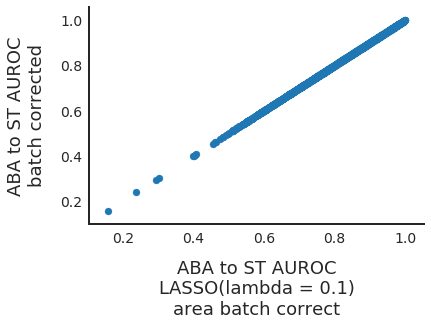

In [92]:
plt.scatter(np.ma.masked_invalid(allST.values), np.ma.masked_invalid(allSTbatch.values), rasterized=True)
plt.xlabel("ABA to ST AUROC\nLASSO(lambda = 0.1)\narea batch correct")
plt.ylabel("ABA to ST AUROC\nbatch corrected")
plt.savefig("050521_11.pdf", bbox_inches='tight')
plt.show()